<a href="https://colab.research.google.com/github/chicago007/test2/blob/main/5%EC%9D%BC%EC%83%81%EC%8A%B9%EC%A2%85%EB%AA%A9%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#종목별 표준화 가격, 최고/최저, 병렬처리

In [46]:
# !pip install pykrx
# !pip install pandas_market_calendars
# !pip install mplfinance
# !pip install --upgrade mplfinance
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
!pip install weasyprint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 850.6/850.6 kB 57.2 MB/s eta 0:00:00


In [7]:
from pykrx import stock
from datetime import datetime, timedelta
import pandas_market_calendars as mcal
import pytz
import calendar


# 한국 시간(Asia/Seoul) 설정
seoul_tz = pytz.timezone("Asia/Seoul")

krx = mcal.get_calendar('XKRX')
today = datetime.now(seoul_tz).date()
start_date = today - timedelta(days=40)
trading_days = krx.valid_days(start_date, today)

print(trading_days[-10])




/usr/local/lib/python3.11/dist-packages/pandas_market_calendars/market_calendar.py:179: UserWarning: ['break_start', 'break_end'] are discontinued, the dictionary `.discontinued_market_times` has the dates on which these were discontinued. The times as of those dates are incorrect, use .remove_time(market_time) to ignore a market_time.
  warnings.warn(


2025-02-10 00:00:00+00:00


종목코드를 입력하세요 (예: 005930): 005930
매수일을 입력하세요 (YYYYMMDD 형식, 예: 20231026): 20240823
매도일을 입력하세요 (YYYYMMDD 형식, 예: 20231126): 20240930

종목코드: 005930
매수일: 2024-08-23
매도일: 2024-09-30



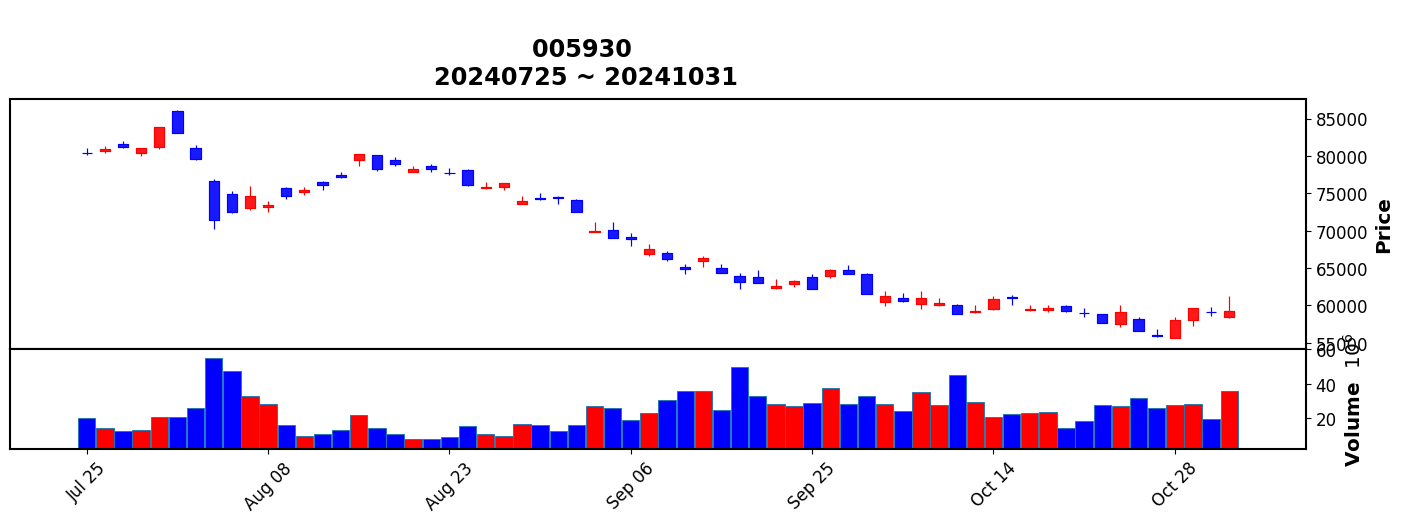

In [64]:
from pykrx import stock
import mplfinance as mpf
import pandas as pd
from datetime import datetime, timedelta
import pandas_market_calendars as mcal
import matplotlib.pyplot as plt
from IPython.display import clear_output
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas_market_calendars")



def get_nearest_business_day_in_the_past(date, days_ago):
    krx = mcal.get_calendar('XKRX')
    start_date = date - timedelta(days=days_ago * 2)
    trading_days = krx.valid_days(start_date, date)
    return trading_days[-days_ago-1].to_pydatetime().date()

def get_nearest_business_day_in_future(date, days_ahead):
    krx = mcal.get_calendar('XKRX')
    end_date = date + timedelta(days=days_ahead * 2)
    trading_days = krx.valid_days(date, end_date)
    return trading_days[days_ahead].to_pydatetime().date()

def plot_stock_chart(stock_code, start_date, end_date):
    # 날짜를 문자열로 변환
    start_date_str = start_date.strftime('%Y%m%d')
    end_date_str = end_date.strftime('%Y%m%d')

    # 주가 데이터 가져오기
    df = stock.get_market_ohlcv_by_date(start_date_str, end_date_str, stock_code)

    # 컬럼명 변경
    df = df.rename(columns={
        '시가': 'Open',
        '고가': 'High',
        '저가': 'Low',
        '종가': 'Close',
        '거래량': 'Volume'
    })

    df.index = pd.to_datetime(df.index)

    # 차트 스타일 설정
    mc = mpf.make_marketcolors(
        up='red',
        down='blue',
        edge='inherit',
        wick='inherit',
        volume={'up': 'red', 'down': 'blue'}
    )

    myrcparams = {'axes.labelsize': 5,  # Adjust x and y axis label font size
                  'axes.titlesize': 8  , # Adjust title font size
                  'xtick.labelsize': 5, # Adjust x tick label font size
                  'ytick.labelsize': 5}

    style = mpf.make_mpf_style(
        base_mpf_style='classic',
        marketcolors=mc,
        gridstyle='',
        y_on_right=True
    )

    # 이전 플롯 초기화
    plt.close('all')

    # 차트 생성
    fig, axes = mpf.plot(
        df,
        type='candle',
        volume=True,
        figsize=(18,5),
        style=style,
        title=f'\n{stock_code} \n{start_date_str} ~ {end_date_str}',
        returnfig=True,
    )

    plt.show()


stock_code = input("종목코드를 입력하세요 (예: 005930): ")
buy_date_str = input("매수일을 입력하세요 (YYYYMMDD 형식, 예: 20231026): ")
sell_date_str = input("매도일을 입력하세요 (YYYYMMDD 형식, 예: 20231126): ")




# 날짜 변환
buy_date = datetime.strptime(buy_date_str, '%Y%m%d').date()
sell_date = datetime.strptime(sell_date_str, '%Y%m%d').date()

# 날짜 범위 계산
start_date = get_nearest_business_day_in_the_past(buy_date, 20)
end_date = get_nearest_business_day_in_future(sell_date, 20)

# 정보 출력
print("\n" + "="*50)
print(f"종목코드: {stock_code}")
print(f"매수일: {buy_date}")
print(f"매도일: {sell_date}")
print("="*50 + "\n")

# 차트 표시
plot_stock_chart(stock_code, start_date, end_date)

/usr/local/lib/python3.11/dist-packages/pandas_market_calendars/market_calendar.py:179: UserWarning: ['break_start', 'break_end'] are discontinued, the dictionary `.discontinued_market_times` has the dates on which these were discontinued. The times as of those dates are incorrect, use .remove_time(market_time) to ignore a market_time.
  warnings.warn(


종목명: 삼성전자, 종목코드: 005930, 매수일: 2023-10-26, 매도일: 2023-11-26


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


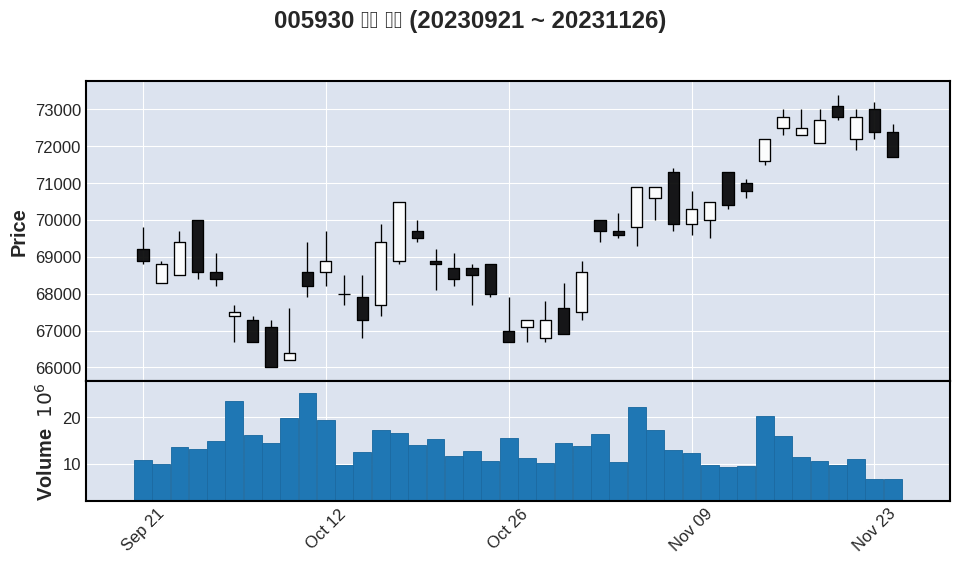

KeyboardInterrupt: Interrupted by user

In [20]:
# prompt: 종목명, 종목코드, 매수일, 매도일이 포함된 리스트를 제공하면 해당종목의 매수일 기준으로 직전 20일부터 매도일 직후 20일까지 시가, 고가, 저가, 종가, 거래량을 전형적인 주식차트로 보여주고
# 종목이 여러종목인 경우 특정키를 눌러야 다음 종목의 정보를 보여주게 만들어주고 데이터는 pykrx에서 가져와져. 앞에서 직전 20일은 거래일기준이므로 거래일 여부도 체크해서 미리 확인해줘

from pykrx import stock
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_market_calendars as mcal
import pytz
import mplfinance as mpf
import pandas as pd
import matplotlib


def get_nearest_business_day_in_the_past(date, days_ago):
    """
    주어진 날짜를 기준으로 거래일 기준 이전 날짜를 계산합니다.

    Args:
        date (datetime.date): 기준 날짜.
        days_ago (int): 이전으로 계산할 거래일 수.

    Returns:
        datetime.date: 거래일 기준 이전 날짜.
    """

    # 한국 시간(Asia/Seoul) 설정
    seoul_tz = pytz.timezone("Asia/Seoul")

    # 한국 거래소 캘린더 가져오기
    krx = mcal.get_calendar('XKRX')

    # 기준 날짜로부터 days_ago일 전까지의 거래일 목록 가져오기
    start_date = date - timedelta(days=days_ago * 2)  # days_ago의 2배를 사용하여 충분한 거래일 확보
    trading_days = krx.valid_days(start_date, date)

    # days_ago번째 이전 거래일 반환
    return trading_days[-days_ago-1].to_pydatetime().date()


def plot_stock_chart(stock_code, start_date, end_date):
    # Convert start_date and end_date to 'YYYYMMDD' format
    start_date = start_date.strftime('%Y%m%d')
    end_date = end_date.strftime('%Y%m%d')

    # 거래일 기준 데이터 가져오기
    df = stock.get_market_ohlcv_by_date(start_date, end_date, stock_code)

    # Rename columns for mplfinance compatibility
    df = df.rename(columns={
        '시가': 'Open',
        '고가': 'High',
        '저가': 'Low',
        '종가': 'Close',
        '거래량': 'Volume'
    })

    # Set index to dates
    df.index = pd.to_datetime(df.index)


    # Create a custom style to change candlestick colors
    mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
    s  = mpf.make_mpf_style(base_mpf_style='classic', marketcolors=mc)

    # Clear cache and reset settings
    plt.close('all')
    matplotlib.rcdefaults()

    # Create candlestick chart with volume
    mpf.plot(df, type='candle', volume=True, figsize=(12, 6),
             title=f'{stock_code} 주식 차트 ({start_date} ~ {end_date})')

    plt.show() # Block execution to ensure user interaction


def display_stock_info(stock_list):
  #stock_list = [['종목명', '종목코드', '매수일', '매도일'], ['삼성전자', '005930', '20231026', '20231126']]
  for i in range(1, len(stock_list)):
      stock_name, stock_code, buy_date_str, sell_date_str = stock_list[i]

      # 날짜 형식 변환
      buy_date = datetime.strptime(buy_date_str, '%Y%m%d').date()
      sell_date = datetime.strptime(sell_date_str, '%Y%m%d').date()

      # 매수일 기준 직전 20 거래일 계산
      start_date = get_nearest_business_day_in_the_past(buy_date, 20)
      # 매도일 기준 이후 20 거래일 계산
      end_date = sell_date

      print(f"종목명: {stock_name}, 종목코드: {stock_code}, 매수일: {buy_date}, 매도일: {sell_date}")

      plot_stock_chart(stock_code, start_date, end_date)
      key = input("다음 종목을 보려면 아무 키나 누르세요...")

# 예시 사용
stock_list = [['종목명', '종목코드', '매수일', '매도일'], ['삼성전자', '005930', '20231026', '20231126'], ['카카오', '035720', '20231020', '20231120']]
display_stock_info(stock_list)


In [ ]:
# prompt: pykrx에서 코스피지수와 코스닥지수의 종가를 2016년부터 현재까지 가져와서 엑셀로 저장해줘

# !pip install pykrx openpyxl

from pykrx import stock
import pandas as pd
from openpyxl import Workbook

# 코스피 지수
kospi_df = stock.get_index_ohlcv("20160101", "20250214", "1001")
# 코스닥 지수
kosdaq_df = stock.get_index_ohlcv("20160101", "20250214", "2001")

# 데이터프레임 병합
merged_df = pd.merge(kospi_df, kosdaq_df, left_index=True, right_index=True, suffixes=('_코스피', '_코스닥'))

# 필요한 컬럼만 선택
merged_df = merged_df[['종가_코스피', '종가_코스닥']]

# 60일 이동평균 계산
merged_df['60일이동평균_코스피'] = merged_df['종가_코스피'].rolling(window=60).mean()
merged_df['60일이동평균_코스닥'] = merged_df['종가_코스닥'].rolling(window=60).mean()

# 120일 이동평균 계산
merged_df['120일이동평균_코스피'] = merged_df['종가_코스피'].rolling(window=120).mean()
merged_df['120일이동평균_코스닥'] = merged_df['종가_코스닥'].rolling(window=120).mean()

print(merged_df)

merged_df.to_excel("KOSPI_KOSDAQ.xlsx")

             종가_코스피  종가_코스닥  60일이동평균_코스피  60일이동평균_코스닥  120일이동평균_코스피  \
날짜                                                                    
2016-01-04  1918.76  677.79          NaN          NaN           NaN   
2016-01-05  1930.53  684.07          NaN          NaN           NaN   
2016-01-06  1925.43  687.27          NaN          NaN           NaN   
2016-01-07  1904.33  679.66          NaN          NaN           NaN   
2016-01-08  1917.62  682.56          NaN          NaN           NaN   
...             ...     ...          ...          ...           ...   
2025-02-10  2521.27  749.67  2478.655667   699.689667   2544.611083   
2025-02-11  2539.05  749.59  2478.287333   699.793167   2544.366417   
2025-02-12  2548.39  745.18  2478.566167   700.065500   2544.296917   
2025-02-13  2583.17  749.28  2480.242833   700.711500   2544.253083   
2025-02-14  2591.05  756.32  2483.142333   701.822667   2544.026000   

            120일이동평균_코스닥  
날짜                        
2016-01-04           N

In [ ]:
!pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 594.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 14.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pykrx import stock
from datetime import datetime
import multiprocessing as mp
from functools import lru_cache
import pytz


# Warning: '시가총액' column not found for 삼영이엔씨_34 on 20241028. Setting market cap to N/A.
# Processing 42: 지투파워_42
# Warning: '시가총액' column not found for 네이처셀_39 on 20241025. Setting market cap to N/A.
# Processing 43: 우진엔텍_43
# Warning: '시가총액' column not found for 넥스턴바이오_41 on 20241024. Setting market cap to N/A.
# Processing 44: 비에이치아이_44
# Processing 45: 카이노스메드_45
# Warning: '시가총액' column not found for 지투파워_42 on 20241023. Setting market cap to N/A.


start_date = "20241028"
ticker_code = "065570"
market_cap = stock.get_market_cap(start_date, start_date, ticker_code)
print(market_cap)


                   시가총액     거래량       거래대금     상장주식수
날짜                                                  
2024-10-28  29541036770  173914  374561765  13613381


In [ ]:
import pandas as pd
from pykrx import stock
from datetime import datetime
import time
import multiprocessing as mp
from functools import lru_cache
import pytz
from concurrent.futures import ThreadPoolExecutor, as_completed  # Import ThreadPoolExecutor

# ... (rest of your code remains the same)
seoul_tz = pytz.timezone('Asia/Seoul')


# @lru_cache(maxsize=None)  # Add lru_cache for caching
def process_stock(stock_info, idx):
    company_name = f"{stock_info['종목명']}_{idx}"

    start_date = stock_info['매수일']
    if start_date == "" or start_date is None:
        return None

    start_date = datetime.strptime(stock_info['매수일'], "%Y-%m-%d").strftime("%Y%m%d")
    end_date = datetime.strptime(stock_info['매도일'], "%Y-%m-%d").strftime("%Y%m%d")

    print(f"Processing {idx}: {company_name}")

    ticker = stock_info['종목코드']
    ticker_code = ticker.lstrip('A')

    df = stock.get_market_ohlcv(start_date, end_date, ticker_code)
    df.reset_index(drop=True, inplace=True)

    if df.empty:
        print(f"데이터가 없습니다: {stock_info['종목명']}")
        return None

    # Normalize closing prices using NumPy for vectorization
    df = df[['종가']].rename(columns={'종가': company_name})
    df[company_name] = df[company_name] / df[company_name].iloc[0] * 100

    start_price = df[company_name].iloc[0]
    end_price = df[company_name].iloc[-1]
    max_price = df[company_name].max()
    min_price = df[company_name].min()

    # 시장 정보 가져오기 & 시장 구분
    if ticker_code in stock.get_market_ticker_list(start_date, market="KOSPI"):
        market = "KOSPI"
    elif ticker_code in stock.get_market_ticker_list(start_date, market="KOSDAQ"):
        market = "KOSDAQ"
    elif ticker_code in stock.get_market_ticker_list(start_date, market="KONEX"):
        market = "KONEX"
    else:
        market = "Unknown"

    time.sleep(1)

    market_cap = stock.get_market_cap(start_date, start_date, ticker_code)
    # Check if '시가총액' column exists before accessing it
    if '시가총액' in market_cap.columns:
        market_cap_value = int(market_cap["시가총액"].iloc[0] / 100_000_000)
        formatted_market_cap = "{:,.0f}억".format(market_cap_value)
    else:
        print(f"Warning: '시가총액' column not found for {company_name} on {start_date}. Setting market cap to N/A.")
        formatted_market_cap = "N/A"  # or any other default value

    summary_data = {
        'company': company_name,
        'market': market,
        'market_cap : ': formatted_market_cap,
        'start_date' : start_date,
        'end_date' : end_date,
        'start_price': start_price,
        'end_price': end_price,
        'min_price': min_price,
        'max_price': max_price,
        'min_rate': round(((min_price / start_price) - 1) * 100, 2),
        'max_rate': round(((max_price / start_price) - 1) * 100, 2),
        'min_date': df[company_name].idxmin(),
        'max_date': df[company_name].idxmax(),
        'final_rate': round(((end_price / start_price) - 1) * 100, 2)
    }

    summary_df = pd.DataFrame(summary_data, index=[0])
    summary_df.index = [company_name]
    summary_df = summary_df.T

    final_df = pd.concat([df, summary_df])

    return final_df


def get_stock_data_summary(stock_list):
    with ThreadPoolExecutor(mp.cpu_count() * 4) as executor:  # Increased thread count
        futures = [executor.submit(process_stock, s, i) for i, s in enumerate(stock_list)]
        results = [f.result() for f in as_completed(futures)]

    final_df = pd.concat(results, axis=1)
    return final_df


if __name__ == "__main__":
    start_time = datetime.now(seoul_tz)
    print(f"시작 시간: {start_time}")

    # stocks = [
    # {'종목명': '위메이드', '종목코드': 'A112040', '매수일': '2024-10-30', '매도일': '2025-01-31'},
    # {'종목명': 'RFHIC', '종목코드': 'A218410', '매수일': '2024-10-25', '매도일': '2025-01-22'},
    # {'종목명': '야스', '종목코드': 'A255440', '매수일': '2024-10-24', '매도일': '2025-01-21'},
    # {'종목명': '두산', '종목코드': 'A000150', '매수일': '2024-10-18', '매도일': '2025-01-15'},
    # ]

    df = pd.read_excel("/content/추세전환1_유니제외.xlsx", "Sheet1")
    stocks = []
    df['매수일'] = df['매수일'].fillna(pd.NaT)
    df['매도일'] = df['매도일'].fillna(pd.NaT)

    for _, row in df.iterrows():
        stocks.append({
            "종목명": row['종목명'], "종목코드": row['종목코드'],
            "매수일": row['매수일'].strftime('%Y-%m-%d') if not pd.isna(row['매수일']) else None,
            "매도일": row['매도일'].strftime('%Y-%m-%d') if not pd.isna(row['매도일']) else None,
        })

    result_df = get_stock_data_summary(stocks[:])
    print(result_df.tail(20))

    end_time = datetime.now(seoul_tz)
    print(f"종료 시간: {end_time}")
    print(f"총 소요 시간: {end_time - start_time}")

    result_df.to_excel("stock_summary_final.xlsx")

시작 시간: 2025-02-16 08:05:02.745764+09:00
Processing 0: 켄코아에어로스페이스_0
Processing 1: 윙스풋_1
Processing 2: 팬젠_2
Processing 3: 라이프시맨틱스_3
Processing 4: AP위성_4
Processing 5: SG_5
Processing 6: 퓨런티어_6
Processing 7: 티사이언티픽_7
Processing 8: 산일전기_8
Processing 9: 컨텍_9
Processing 10: 비투엔_10
Processing 11: 에이치브이엠_11
Processing 12: 알파홀딩스_12
Processing 13: 경남제약_13
Processing 14: 삼현_14
Processing 15: 참좋은여행_15
Processing 16: 원익홀딩스_16
Processing 17: 에스씨엠생명과학_17
Processing 18: 유바이오로직스_18
Processing 19: 휴마시스_19
Processing 20: 비상교육_20
Processing 21: 아이스크림미디어_21
Processing 22: 에이디테크놀로지_22
Processing 23: DS단석_23
Processing 24: 제노포커스_24
Processing 25: 에이직랜드_25
Processing 26: 예림당_26
Processing 27: 피엠티_27
Processing 28: 피플바이오_28
Processing 29: 동서_29
Processing 30: 한화인더스트리얼솔루션즈_30
Processing 31: 디어유_31
Processing 32: 프레스티지바이오파마_32
Processing 33: 이렘_33
Processing 34: 삼영이엔씨_34
Processing 35: 전진건설로봇_35
Processing 36: 드림어스컴퍼니_36
Processing 37: GRT_37
Processing 38: 한일단조_38
Processing 39: 네이처셀_39
Processing 40: 모비데이즈_40


In [ ]:
import pandas as pd
from pykrx import stock
from datetime import datetime


def get_stock_data_summary(stock_list):
    final_df = pd.DataFrame()

    s_date = {}
    markets = {}
    markets_cap = {}
    max_prices = {}
    min_prices = {}
    max_rates = {}
    min_rates = {}
    max_dates = {}
    min_dates = {}
    final_rates = {}
    start_prices = {}
    end_prices = {}
    company_names = []

    for i, stock_info in enumerate(stock_list[:]):
        company_name = f"{stock_info['종목명']}_{i}"
        company_names.append(company_name)

        start_date = stock_info['매수일']
        # start_date가 blank인 경우 건너뛰기
        if start_date == "" or start_date is None:
            continue
        start_date = datetime.strptime(stock_info['매수일'], "%Y-%m-%d").strftime("%Y%m%d")
        end_date = datetime.strptime(stock_info['매도일'], "%Y-%m-%d").strftime("%Y%m%d")

        print(i, company_name)

        ticker = stock_info['종목코드']
        ticker_code = ticker.lstrip('A')

        df = stock.get_market_ohlcv(start_date, end_date, ticker_code)
        df = df[['종가']].rename(columns={'종가': company_name})
        df[company_name] = df[company_name]/df[company_name].iloc[0]*100
        df.reset_index(drop=True, inplace=True)

        final_df = pd.merge(final_df, df, left_index=True, right_index=True, how='outer') if not final_df.empty else df

        # 시장 정보 가져오기 & 시장 구분
        if ticker_code in stock.get_market_ticker_list(start_date, market="KOSPI"):
            market = "KOSPI"
        elif ticker_code in stock.get_market_ticker_list(start_date, market="KOSDAQ"):
            market = "KOSDAQ"
        elif ticker_code in stock.get_market_ticker_list(start_date, market="KONEX"):
            market = "KONEX"
        else:
            market = "Unknown"

        market_cap = stock.get_market_cap(start_date, start_date, ticker_code)
        # 시가총액 값만 가져오기
        market_cap_value = int(market_cap["시가총액"].iloc[0] / 100_000_000)
        # 시가총액을 억 단위로 표시하고 천 단위 구분 기호 추가
        formatted_market_cap = "{:,.0f}억".format(market_cap_value)

        s_date[company_name] = start_date
        markets[company_name] = market
        markets_cap[company_name] = formatted_market_cap
        max_prices[company_name] = df[company_name].max()
        min_prices[company_name] = df[company_name].min()
        max_rates[company_name] = round(((df[company_name].max()/df[company_name].iloc[0])-1)*100, 2)
        min_rates[company_name] = round(((df[company_name].min()/df[company_name].iloc[0])-1)*100, 2)
        max_dates[company_name] = df[company_name].idxmax()
        min_dates[company_name] = df[company_name].idxmin()
        final_rates[company_name] = round(((df[company_name].iloc[-1]/df[company_name].iloc[0])-1)*100, 2)
        start_prices[company_name] = df[company_name].iloc[0]
        end_prices[company_name] = df[company_name].iloc[-1]



    additional_data = {
        '종목별': ['시장구분', '시가총액', '시작일', '시작일주가', '종료일주가', '최저주가', '최고주가', '최저하락률', '최고상승률', '최저주가일', '최고주가일', '최종수익률'],
        **{name: [
            markets.get(name, 'N/A'),
            markets_cap.get(name, 'N/A'),
            s_date.get(name, 'N/A'),
            start_prices.get(name, 'N/A'),
            end_prices.get(name, 'N/A'),
            min_prices.get(name, 'N/A'),
            max_prices.get(name, 'N/A'),
            min_rates.get(name, 'N/A'),
            max_rates.get(name, 'N/A'),
            min_dates.get(name, 'N/A'),
            max_dates.get(name, 'N/A'),
            final_rates.get(name, 'N/A'),
        ] for name in company_names}
    }

    additional_df = pd.DataFrame(additional_data).set_index('종목별')
    additional_df = additional_df.astype(str)

    print(additional_data)

    return pd.concat([final_df, additional_df])

# 입력 데이터
stocks = [
    {'종목명': '위메이드', '종목코드': 'A112040', '매수일': '2024-10-30', '매도일': '2025-01-31'},
    {'종목명': 'RFHIC', '종목코드': 'A218410', '매수일': '2024-10-25', '매도일': '2025-01-22'},
    {'종목명': '야스', '종목코드': 'A255440', '매수일': '2024-10-24', '매도일': '2025-01-21'},
    {'종목명': '두산', '종목코드': 'A000150', '매수일': '2024-10-18', '매도일': '2025-01-15'},
]


# 엑셀 파일 읽기
# df = pd.read_excel("/content/5일20%_all.xlsx", "Sheet2")
# stocks = []
# # Handle NaT values for '매수일' and '매도일'
# df['매수일'] = df['매수일'].fillna(pd.NaT)
# df['매도일'] = df['매도일'].fillna(pd.NaT)

# # DataFrame을 JSON 형식으로 변환
# stocks = []
# for _, row in df.iterrows():
#     stocks.append({
#         "종목명": row['종목명'], "종목코드": row['종목코드'],
#         "매수일": row['매수일'].strftime('%Y-%m-%d') if not pd.isna(row['매수일']) else None,
#         "매도일": row['매도일'].strftime('%Y-%m-%d') if not pd.isna(row['매도일']) else None,
#     })

result_df = get_stock_data_summary(stocks)
print(result_df.tail(20))
# result_df.to_excel("stock_summary_final.xlsx")


0 위메이드_0


KeyError: '시가총액'

# 인덱스 리셋

In [ ]:
!pip install pykrx

In [ ]:
import pandas as pd
from pykrx import stock
from datetime import datetime

def get_stock_data_pivot(stock_list):
    final_df = pd.DataFrame()
    max_prices = {}
    min_prices = {}
    max_rates = {}
    min_rates = {}
    max_dates = {}
    min_dates = {}
    # company_names = [s['종목명'] for s in stock_list]  # 종목명 추출
    company_names = []

    for i, stock_info in enumerate(stock_list[:]):  # 최대 150개 항목 처리
        company_name = f"{stock_info['종목명']}_{i}"  # 고유 이름 생성
        company_names.append(company_name)
        start_date = datetime.strptime(stock_info['매수일'], "%Y-%m-%d").strftime("%Y%m%d")
        end_date = datetime.strptime(stock_info['매도일'], "%Y-%m-%d").strftime("%Y%m%d")

        print(i, company_name)  # 진행 상황 확인

        # 종목 코드 찾기
        tickers = stock.get_market_ticker_list(start_date, "ALL")
        ticker = next((t for t in tickers if stock.get_market_ticker_name(t) == stock_info['종목명']), None)

        if ticker is None:
            print(f"종목을 찾을 수 없습니다: {stock_info['종목명']}")
            continue

        # 주가 데이터 가져오기
        df = stock.get_market_ohlcv(start_date, end_date, ticker)
        df = df[['종가']].rename(columns={'종가': company_name})
        df.reset_index(drop=True, inplace=True)

        # 최고가/최저가 계산
        max_prices[company_name] = df[company_name].max()
        min_prices[company_name] = df[company_name].min()
        max_rates[company_name] = round(((df[company_name].max()/df[company_name].iloc[0])-1)*100,2)
        min_rates[company_name] = round(((df[company_name].min()/df[company_name].iloc[0])-1)*100,2)
        max_dates[company_name] = df[company_name].idxmax()
        min_dates[company_name] = df[company_name].idxmin()
        # print(df[company_name][0])

        # 데이터 병합
        final_df = pd.merge(final_df, df, left_index=True, right_index=True, how='outer') if not final_df.empty else df
        # print(final_df)
    # 추가 행 생성 (수정)
    additional_data = {
    '종목별': ['최저주가', '최고주가', '최저하락률', '최고상승률', '최저주가일', '최고주가일'],
    **{name: [
        min_prices.get(name, 'N/A'),
        max_prices.get(name, 'N/A'),
        min_rates.get(name, 'N/A'),
        max_rates.get(name, 'N/A'),
        min_dates.get(name, 'N/A'),
        max_dates.get(name, 'N/A')
    ] for name in company_names}
}
    additional_df = pd.DataFrame(additional_data).set_index('종목별')

    return pd.concat([final_df, additional_df])

# # 입력 데이터
# stocks = [
#     {'종목명': '위메이드', '매수일': '2024-10-30', '매도일': '2025-01-31'},
#     {'종목명': 'RFHIC', '매수일': '2024-10-25', '매도일': '2025-01-22'},
#     {'종목명': '야스', '매수일': '2024-10-24', '매도일': '2025-01-21'},
#     {'종목명': '두산', '매수일': '2024-10-18', '매도일': '2025-01-15'},
#     {'종목명': '코오롱티슈진', '매수일': '2024-10-17', '매도일': '2025-01-14'},
# ]



# 엑셀 파일 읽기
df = pd.read_excel("종목리스트_5일_20%.xlsx", "Sheet2")  # 실제 엑셀 파일명으로 변경해주세요
# print(df.head(230))
# DataFrame을 JSON 형식으로 변환
stocks = []
for _, row in df.iterrows():
    stocks.append({
        "종목명": row['종목명'],
        "매수일": row['매수일'].strftime('%Y-%m-%d'),
        "매도일": row['매도일'].strftime('%Y-%m-%d')
    })


result_df = get_stock_data_pivot(stocks)
result_df.to_excel("stock_analysis_final.xlsx")
print(result_df)


0 위메이드_0
1 RFHIC_1
2 야스_2
3 두산_3
4 코오롱티슈진_4
5 브릿지바이오테라퓨틱스_5
6 코스모화학_6
7 롯데케미칼_7
8 제이앤티씨_8
9 대한유화_9
10 효성티앤씨_10
11 송원산업_11
12 코스모신소재_12
13 대주전자재료_13
14 엘앤에프_14
15 LS_15
16 한진칼_16
17 바이오다인_17
18 원준_18
19 HPSP_19
20 에이스테크_20
21 HD현대일렉트릭_21
22 영풍정밀_22
23 고려아연_23
24 유한양행_24
25 레인보우로보틱스_25
26 HD현대에너지솔루션_26
27 레이크머티리얼즈_27
28 티앤엘_28
29 솔브레인홀딩스_29
30 엘티씨_30
31 SK하이닉스_31
32 엔켐_32
33 인탑스_33
34 이엔에프테크놀로지_34
35 GST_35
36 월덱스_36
37 한화솔루션_37
38 SBI핀테크솔루션즈_38
39 디앤씨미디어_39
40 주성엔지니어링_40
41 제우스_41
42 이수페타시스_42
43 휴젤_43
44 제넥신_44
45 리노공업_45
46 크라우드웍스_46
47 ISC_47
48 SK오션플랜트_48
49 녹십자_49
50 뷰노_50
51 휴메딕스_51
52 SK바이오팜_52
53 씨에스윈드_53
54 파마리서치_54
55 헬릭스미스_55
56 이엠텍_56
57 태영건설_57
58 HD현대중공업_58
59 올릭스_59
60 F&F_60
61 성광벤드_61
62 GS건설_62
63 태광_63
64 HD현대건설기계_64
65 다산네트웍스_65
66 코오롱티슈진_66
67 두산로보틱스_67
68 효성중공업_68
69 브릿지바이오테라퓨틱스_69
70 케이씨텍_70
71 유니테크노_71
72 푸드나무_72
73 삼천당제약_73
74 넥슨게임즈_74
75 솔루스첨단소재_75
76 이랜텍_76
77 더존비즈온_77
78 메디톡스_78
79 코웨이_79
80 세진중공업_80
81 GS_81
82 DB하이텍_82
83 LIG넥스원_83
84 코스맥스_84
85 화신_85
86 서연

#5일간 20% 이상 상승한 종목의 60일간 주가데이터를 받아옴


In [ ]:
!pip install pykrx

In [ ]:
import pandas as pd
from pykrx import stock
from datetime import datetime

def get_stock_data_pivot(stock_list):
    final_df = pd.DataFrame()
    max_prices = {}
    min_prices = {}
    max_rates = {}
    min_rates = {}
    max_dates = {}
    min_dates = {}
    # company_names = [s['종목명'] for s in stock_list]  # 종목명 추출
    company_names = []

    for i, stock_info in enumerate(stock_list[:]):  # 최대 150개 항목 처리
        company_name = f"{stock_info['종목명']}_{i}"  # 고유 이름 생성
        company_names.append(company_name)
        start_date = datetime.strptime(stock_info['매수일'], "%Y-%m-%d").strftime("%Y%m%d")
        end_date = datetime.strptime(stock_info['매도일'], "%Y-%m-%d").strftime("%Y%m%d")

        # print(i, company_name)  # 진행 상황 확인

        # 종목 코드 찾기
        tickers = stock.get_market_ticker_list(start_date, "ALL")
        ticker = next((t for t in tickers if stock.get_market_ticker_name(t) == stock_info['종목명']), None)

        if ticker is None:
            print(f"종목을 찾을 수 없습니다: {stock_info['종목명']}")
            continue

        # 주가 데이터 가져오기
        df = stock.get_market_ohlcv(start_date, end_date, ticker)
        df = df[['종가']].rename(columns={'종가': company_name})


        # 최고가/최저가 계산
        max_prices[company_name] = df[company_name].max()
        min_prices[company_name] = df[company_name].min()
        max_rates[company_name] = round(((df[company_name].max()/df[company_name].iloc[0])-1)*100,2)
        min_rates[company_name] = round(((df[company_name].min()/df[company_name].iloc[0])-1)*100,2)
        max_dates[company_name] = df[company_name].idxmax().strftime('%Y-%m-%d')
        min_dates[company_name] = df[company_name].idxmin().strftime('%Y-%m-%d')
        # print(df[company_name][0])

        # 데이터 병합
        final_df = pd.merge(final_df, df, left_index=True, right_index=True, how='outer') if not final_df.empty else df
        # print(final_df)
    # 추가 행 생성 (수정)
    additional_data = {
    '종목별': ['최저주가', '최고주가', '최저하락률', '최고상승률', '최저주가일', '최고주가일'],
    **{name: [
        min_prices.get(name, 'N/A'),
        max_prices.get(name, 'N/A'),
        min_rates.get(name, 'N/A'),
        max_rates.get(name, 'N/A'),
        min_dates.get(name, 'N/A'),
        max_dates.get(name, 'N/A')
    ] for name in company_names}
}
    additional_df = pd.DataFrame(additional_data).set_index('종목별')

    return pd.concat([final_df, additional_df])

# # 입력 데이터
# stocks = [
#     {'종목명': '위메이드', '매수일': '2024-10-30', '매도일': '2025-01-31'},
#     {'종목명': 'RFHIC', '매수일': '2024-10-25', '매도일': '2025-01-22'},
#     {'종목명': '야스', '매수일': '2024-10-24', '매도일': '2025-01-21'},
#     {'종목명': '두산', '매수일': '2024-10-18', '매도일': '2025-01-15'},
#     {'종목명': '코오롱티슈진', '매수일': '2024-10-17', '매도일': '2025-01-14'},
# ]



# 엑셀 파일 읽기
df = pd.read_excel("/종목리스트_5일_20%.xlsx", "Sheet2")  # 실제 엑셀 파일명으로 변경해주세요
# print(df.head(230))
# DataFrame을 JSON 형식으로 변환
stocks = []
for _, row in df.iterrows():
    stocks.append({
        "종목명": row['종목명'],
        "매수일": row['매수일'].strftime('%Y-%m-%d'),
        "매도일": row['매도일'].strftime('%Y-%m-%d')
    })


result_df = get_stock_data_pivot(stocks)
result_df.to_excel("stock_analysis_final.xlsx")
print(result_df)


0 위메이드_0
1 RFHIC_1
2 야스_2
3 두산_3
4 코오롱티슈진_4
5 브릿지바이오테라퓨틱스_5
6 코스모화학_6
7 롯데케미칼_7
8 제이앤티씨_8
9 대한유화_9
10 효성티앤씨_10
11 송원산업_11
12 코스모신소재_12
13 대주전자재료_13
14 엘앤에프_14
15 LS_15
16 한진칼_16
17 바이오다인_17
18 원준_18
19 HPSP_19
20 에이스테크_20
21 HD현대일렉트릭_21
22 영풍정밀_22
23 고려아연_23
24 유한양행_24
25 레인보우로보틱스_25
26 HD현대에너지솔루션_26
27 레이크머티리얼즈_27
28 티앤엘_28
29 솔브레인홀딩스_29
30 엘티씨_30
31 SK하이닉스_31
32 엔켐_32
33 인탑스_33
34 이엔에프테크놀로지_34
35 GST_35
36 월덱스_36
37 한화솔루션_37
38 SBI핀테크솔루션즈_38
39 디앤씨미디어_39
40 주성엔지니어링_40
41 제우스_41
42 이수페타시스_42
43 휴젤_43
44 제넥신_44
45 리노공업_45
46 크라우드웍스_46
47 ISC_47
48 SK오션플랜트_48
49 녹십자_49
50 뷰노_50
51 휴메딕스_51
52 SK바이오팜_52
53 씨에스윈드_53
54 파마리서치_54
55 헬릭스미스_55
56 이엠텍_56
57 태영건설_57
58 HD현대중공업_58
59 올릭스_59
60 F&F_60
61 성광벤드_61
62 GS건설_62
63 태광_63
64 HD현대건설기계_64
65 다산네트웍스_65
66 코오롱티슈진_66
67 두산로보틱스_67
68 효성중공업_68
69 브릿지바이오테라퓨틱스_69
70 케이씨텍_70
71 유니테크노_71
72 푸드나무_72
73 삼천당제약_73
74 넥슨게임즈_74
75 솔루스첨단소재_75
76 이랜텍_76
77 더존비즈온_77
78 메디톡스_78
79 코웨이_79
80 세진중공업_80
81 GS_81
82 DB하이텍_82
83 LIG넥스원_83
84 코스맥스_84
85 화신_85
86 서연

#엑셀자료 json변환

In [ ]:
import pandas as pd

# 엑셀 파일 읽기
df = pd.read_excel("/종목리스트_5일_20%.xlsx", "Sheet2")  # 실제 엑셀 파일명으로 변경해주세요
print(df)
# DataFrame을 JSON 형식으로 변환
json_data = []
i = 0
for _, row in df.iterrows():
    json_data.append({
        "종목명": row['종목명'],
        "매수일": row['매수일'].strftime('%Y-%m-%d'),
        "매도일": row['매도일'].strftime('%Y-%m-%d')
    })
    i += 1

# JSON 형식으로 출력
print("[")
for i, item in enumerate(json_data):
    if i < len(json_data) - 1:
        print(f"    {str(item)},")
    else:
        print(f"    {str(item)}")
print("]")

          종목명        매수일        매도일     종목코드       수익률
0        위메이드 2024-10-30 2025-01-31  A112040  0.025641
1       RFHIC 2024-10-25 2025-01-22  A218410  0.029903
2          야스 2024-10-24 2025-01-21  A255440 -0.203985
3          두산 2024-10-18 2025-01-15  A000150  0.330097
4      코오롱티슈진 2024-10-17 2025-01-14  A950160  0.848559
...       ...        ...        ...      ...       ...
1809      제우스 2017-01-06 2017-04-05  A079370  0.087818
1810      HLB 2017-01-05 2017-04-04  A028300  0.003252
1811  뉴파워프라즈마 2017-01-02 2017-03-30  A144960 -0.004357
1812   대주전자재료 2017-01-02 2017-03-30  A078600  0.047674
1813    동아에스티 2017-01-02 2017-03-30  A170900 -0.105266

[1814 rows x 5 columns]
[
    {'종목명': '위메이드', '매수일': '2024-10-30', '매도일': '2025-01-31'},
    {'종목명': 'RFHIC', '매수일': '2024-10-25', '매도일': '2025-01-22'},
    {'종목명': '야스', '매수일': '2024-10-24', '매도일': '2025-01-21'},
    {'종목명': '두산', '매수일': '2024-10-18', '매도일': '2025-01-15'},
    {'종목명': '코오롱티슈진', '매수일': '2024-10-17', '매도일': '2025-01-14'},

#종목명 체크

In [ ]:
import pandas as pd
from pykrx import stock
from datetime import datetime

def get_stock_data_pivot(stock_list):
    # final_df = pd.DataFrame()
    # max_prices = {}
    # min_prices = {}
    # max_rates = {}
    # min_rates = {}
    # max_dates = {}
    # min_dates = {}
    # # company_names = [s['종목명'] for s in stock_list]  # 종목명 추출
    # company_names = []

    for i, stock_info in enumerate(stock_list[:]):  # 최대 150개 항목 처리
        company_name = f"{stock_info['종목명']}_{i}"  # 고유 이름 생성
        # company_names.append(company_name)
        start_date = datetime.strptime(stock_info['매수일'], "%Y-%m-%d").strftime("%Y%m%d")
        end_date = datetime.strptime(stock_info['매도일'], "%Y-%m-%d").strftime("%Y%m%d")

        # print(i, company_name)  # 진행 상황 확인

        # 종목 코드 찾기
        tickers = stock.get_market_ticker_list(start_date, "ALL")
        ticker = next((t for t in tickers if stock.get_market_ticker_name(t) == stock_info['종목명']), None)

        if ticker is None:
            print(f"종목을 찾을 수 없습니다: {i} {stock_info['종목명']}")
            continue

    return


# 엑셀 파일 읽기
df = pd.read_excel("/content/5일20%_all.xlsx", "Sheet2")  # 실제 엑셀 파일명으로 변경해주세요
# print(df.head(230))
# DataFrame을 JSON 형식으로 변환
stocks = []
# Handle NaT values for '매수일' and '매도일'
df['매수일'] = df['매수일'].fillna(pd.NaT)
df['매도일'] = df['매도일'].fillna(pd.NaT)

# DataFrame을 JSON 형식으로 변환
stocks = []
for _, row in df.iterrows():
    stocks.append({
        "종목명": row['종목명'],
        "매수일": row['매수일'].strftime('%Y-%m-%d') if not pd.isna(row['매수일']) else None,
        "매도일": row['매도일'].strftime('%Y-%m-%d') if not pd.isna(row['매도일']) else None,
    })

# print(stocks)

get_stock_data_pivot(stocks)
# result_df.to_excel("stock_analysis_final.xlsx")
# print(result_df)


종목을 찾을 수 없습니다: 1 한화인더스트리얼솔루션즈
종목을 찾을 수 없습니다: 142 에스유홀딩스
종목을 찾을 수 없습니다: 179 비트나인
종목을 찾을 수 없습니다: 199 STX중공업
종목을 찾을 수 없습니다: 258 스카이문스테크놀로지
종목을 찾을 수 없습니다: 347 젬백스링크
종목을 찾을 수 없습니다: 364 윈텍
종목을 찾을 수 없습니다: 391 와이아이케이
종목을 찾을 수 없습니다: 433 룽투코리아
종목을 찾을 수 없습니다: 446 엔터파트너즈
종목을 찾을 수 없습니다: 459 에이프로젠 H&G
종목을 찾을 수 없습니다: 468 하인크코리아
종목을 찾을 수 없습니다: 473 이노시스
종목을 찾을 수 없습니다: 514 에스유홀딩스
종목을 찾을 수 없습니다: 519 리노스
종목을 찾을 수 없습니다: 551 젬백스링크
종목을 찾을 수 없습니다: 577 롯데정보통신
종목을 찾을 수 없습니다: 578 인포마크
종목을 찾을 수 없습니다: 611 비플라이소프트
종목을 찾을 수 없습니다: 632 트루윈
종목을 찾을 수 없습니다: 639 동일철강
종목을 찾을 수 없습니다: 687 에이치앤비디자인
종목을 찾을 수 없습니다: 706 스피어파워
종목을 찾을 수 없습니다: 716 대유에이피
종목을 찾을 수 없습니다: 726 스카이문스테크놀로지
종목을 찾을 수 없습니다: 748 디딤이앤에프
종목을 찾을 수 없습니다: 750 바이옵트로
종목을 찾을 수 없습니다: 771 LS전선아시아
종목을 찾을 수 없습니다: 860 텔레필드
종목을 찾을 수 없습니다: 894 SBW생명과학
종목을 찾을 수 없습니다: 917 오하임아이엔티
종목을 찾을 수 없습니다: 936 KT서브마린
종목을 찾을 수 없습니다: 962 에스유홀딩스
종목을 찾을 수 없습니다: 973 STX중공업
종목을 찾을 수 없습니다: 992 덕신하우징
종목을 찾을 수 없습니다: 1009 알비케이그룹
종목을 찾을 수 없습니다: 1017 브이티지엠피
종목을 찾을 수 없습니다: 1024 에이트원
종목을 찾을 수 없습니다: 10

TypeError: strptime() argument 1 must be str, not None